In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('figure', facecolor = 'w')
plt.rc('figure', dpi=100)
plt.rc('font', size=14)
import csky as cy
import healpy as hp
import scipy.stats
#cy.plotting.mrichman_mpl()

In [2]:
sbc = sns.color_palette( n_colors=15
                          )

In [3]:
#colors = [ sbc[9], '#E37222', '#343E78', '#800000', 'grey']
colors = ['#FF7F0E', '#0B3D53', '#5C9FC9', ]
#colors = [ 'teal', '#FF7F0E','firebrick',  ]

In [4]:
colors

['#FF7F0E', '#0B3D53', '#5C9FC9']

In [5]:
plot_dir = cy.utils.ensure_dir('/home/ssclafani/public_html/DNNC/paperplots/Fig4')

In [6]:
kra5, _, _, ebins5 = np.load('/data/ana/analyses/NuSources/2021_DNNCascade_analyses/templates/KRA-gamma_5PeV_maps_energies.tuple.npy', allow_pickle = True, encoding='latin1')
kra50, _, _, ebins50 = np.load('/data/ana/analyses/NuSources/2021_DNNCascade_analyses/templates/KRA-gamma_maps_energies.tuple.npy', allow_pickle=True, encoding='latin1')
pi0 = np.load('/data/ana/analyses/NuSources/2021_DNNCascade_analyses/templates/Fermi-LAT_pi0_map.npy', allow_pickle=True, encoding='latin1')


In [7]:
import healpy as hp
a = hp.nside2pixarea(128)
print(a)

6.391586616190171e-05


In [8]:
dat = np.loadtxt('saved_sens/piecewise_fitresult.txt', skiprows = 13)
x = dat[:,0]
x_err_low = x - dat[:,1]
x_err_high = dat[:,2] - x

# from fit
tnorm = 1.e-8 * (4*np.pi)

y = tnorm * dat[:,3]

y_max = tnorm * dat[:,-1]
y_min = tnorm * dat[:,-2]

y_err_high = y_max - y
y_err_low = y - y_min

indices_UL = np.array([5,8,9, 10, 11, 12])

# visualize upper limits with corresponding marker
y[indices_UL] = y[indices_UL]+y_err_high[indices_UL]

uplims = np.zeros(x.shape)
uplims[[indices_UL]]=True

# plot the points with non-zero best fit (i.e. not upper-limits)
x_new = np.delete(x, indices_UL)
x_err_high_new = np.delete(x_err_high, indices_UL)
x_err_low_new = np.delete(x_err_low, indices_UL)

y_new = np.delete(y, indices_UL)
y_err_high_new = np.delete(y_err_high, indices_UL)
y_err_low_new = np.delete(y_err_low, indices_UL)

/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


In [9]:
georg_flux = np.load('/data/user/gschwefer/misc/for_steve/fermi_pi0_gamma_ray_allsky_average_E2Phi_2.7_extrapol.npy', allow_pickle=True)
georg_energy = np.load('/data/user/gschwefer/misc/for_steve/fermi_pi0_gamma_ray_energies.npy', allow_pickle=True)
georg_flux = 0.31* georg_flux

In [10]:
hans_result = np.loadtxt('saved_sens/Cascades_PRL_2010_11_12_13_14_15_pp_nominal_1sigma.txt', skiprows=1)

In [11]:
hans_gammas = hans_result[:,0]
hans_norm = hans_result[:,1]

In [12]:
hans_flux = {}
for i, gamma in enumerate(hans_gammas):
    Es = np.linspace(16000,2.6e6, 1000)
    hans_flux[gamma] =  Es**2*1e-18*hans_norm[i]*((Es/1e5)**(-1*hans_gammas[i]))
    
bestfithans = Es**2*1e-18*1.66*((Es/1e5)**-2.53)

In [13]:
1e5**2*1e-18*1.66*((1e5/1e5)**-2.53)

1.66e-08

In [14]:
print(list(zip( np.arange(10e3,101e3, 5000), np.interp( np.arange(10e3,101e3, 5000), Es, bestfithans) * (np.pi*4))))

[(10000.0, 5.509781306739892e-07), (15000.0, 5.509781306739892e-07), (20000.0, 4.903556215781266e-07), (25000.0, 4.353907382606658e-07), (30000.0, 3.951456803014795e-07), (35000.0, 3.6406205799048045e-07), (40000.0, 3.391335305703586e-07), (45000.0, 3.18573607638157e-07), (50000.0, 3.0124541189058664e-07), (55000.0, 2.863866453119117e-07), (60000.0, 2.734646389197237e-07), (65000.0, 2.6211332321343536e-07), (70000.0, 2.5202438557429107e-07), (75000.0, 2.4297876065603737e-07), (80000.0, 2.3480961776161964e-07), (85000.0, 2.27385077324912e-07), (90000.0, 2.2059935502637146e-07), (95000.0, 2.1436649594251992e-07), (100000.0, 2.08615850513191e-07)]


In [15]:
bestfithans[np.where(np.round(Es) == 30000)]

array([], dtype=float64)

In [16]:
points = np.ndarray((len(hans_gammas), 1000))
xs = np.logspace(4.20411998,6.41497334,1000)

for i, gamma in enumerate(hans_gammas):
    points[i] = np.interp(np.log10(xs) ,np.log10(Es), hans_flux[gamma])
    

In [17]:
print(points.shape)

mins = np.min(points, axis=0)
maxs = np.max(points, axis=0)

(67, 1000)


(5e-10, 1e-06)

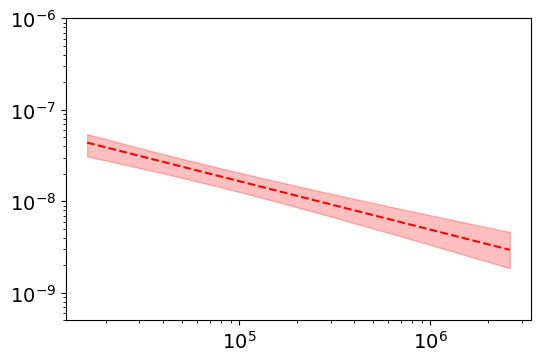

In [18]:
plt.fill_between(xs, mins, maxs, color='r', alpha=0.25)
plt.plot(Es, bestfithans, c='r', ls='--')
plt.loglog()
plt.ylim(5e-10,1e-6)
#plt.xlim(1e4,1e8)

In [19]:
''' pi0flux = [1271.8527801661924, 0.020005181457912437,
1553.1845690893892, 0.01852439272816013,
1922.519128617942, 0.016478593938396482,
2381.49216131387, 0.014615905579883785,
2895.9554838722925, 0.012866607693166323,
3585.370348580028, 0.011101706303158538,
4375.590098581272, 0.009635108280540587,
5397.82609630125, 0.008285718315429003,
6645.846422152243, 0.007095591309854342,
8182.418973649131, 0.006067527085469145,
10074.25932040286, 0.005203618510847123,
12318.748238749182, 0.004495475813262984,
15166.940810483744, 0.0038723560749193814,
19149.109652203424, 0.0032775651321566347,
23576.536108990374, 0.0028150126763895286,
28772.831793568785, 0.0024502918550690176,
35494.8107159693, 0.002113304010356377,
43701.49326658316, 0.001825711674448281,
53717.853633984676, 0.0015706784002100286,
65793.2201885699, 0.0013546635088702511,
81005.13599200615, 0.0011600851314746696,
94194.95560159562, 0.001041064937747737
]
pi0_EGeV = np.array(pi0flux[::2]) /1e3
pi0_fluxGeV = np.array(pi0flux[1::2])  /1e3    
b1, b0, _r, _p_val, _stderr = scipy.stats.linregress(np.log10(pi0_EGeV[11:]), 
                                           np.log10(pi0_fluxGeV[11:])) 
x_pred = np.linspace(2,7, 100)
y_pred = b1 * x_pred + b0   '''

' pi0flux = [1271.8527801661924, 0.020005181457912437,\n1553.1845690893892, 0.01852439272816013,\n1922.519128617942, 0.016478593938396482,\n2381.49216131387, 0.014615905579883785,\n2895.9554838722925, 0.012866607693166323,\n3585.370348580028, 0.011101706303158538,\n4375.590098581272, 0.009635108280540587,\n5397.82609630125, 0.008285718315429003,\n6645.846422152243, 0.007095591309854342,\n8182.418973649131, 0.006067527085469145,\n10074.25932040286, 0.005203618510847123,\n12318.748238749182, 0.004495475813262984,\n15166.940810483744, 0.0038723560749193814,\n19149.109652203424, 0.0032775651321566347,\n23576.536108990374, 0.0028150126763895286,\n28772.831793568785, 0.0024502918550690176,\n35494.8107159693, 0.002113304010356377,\n43701.49326658316, 0.001825711674448281,\n53717.853633984676, 0.0015706784002100286,\n65793.2201885699, 0.0013546635088702511,\n81005.13599200615, 0.0011600851314746696,\n94194.95560159562, 0.001041064937747737\n]\npi0_EGeV = np.array(pi0flux[::2]) /1e3\npi0_fluxGe

In [20]:
#90% erange
#erange_kra5 = [5200, 145000]
#erange_kra50 = [6900, 357000]
#erange_pi0 = [1500, 282000]
#68% erange
#erange_kra5 = [10100, 81000]
#erange_kra50 = [18200, 162000]
#erange_pi0 = [3600, 99000]



#ranges from ts
erange_kra5 = [968, 99754]
erange_kra50 = [1019, 145377]
erange_pi0 = [796, 68869]

In [21]:
mask5 = (ebins5 > erange_kra5[0]) & (ebins5 < erange_kra5[1])
mask50 = (ebins50 > erange_kra50[0]) & (ebins50 < erange_kra50[1])
#maskpi0 = (10**x_pred > 1500) & (10**x_pred < 315000)
maskpi0_georg = (georg_energy > np.log10(erange_pi0[0])) & (georg_energy < np.log10(erange_pi0[1]))

In [22]:
pi0modelnorm = 4.53e-12
pi0_range = [1.69e-11, 2.18e-11, 2.71e-11]
pi0_model_range = np.array(pi0_range) / pi0modelnorm
print(pi0_range)
print(pi0_range[0] - pi0_range[1])
print(pi0_range[2] - pi0_range[1])

[1.69e-11, 2.18e-11, 2.71e-11]
-4.899999999999997e-12
5.3000000000000004e-12


In [23]:
pi0_model_range

array([3.73068433, 4.81236203, 5.98233996])

In [24]:
#pi0_range = [4.23, 5.45, 7]
kra5_range = [.650, .894,  1.18]
kra50_range = [.416, .592, 0.794]

In [25]:
print(kra5_range[0] - kra5_range[1])
print(kra5_range[2] - kra5_range[1])

-0.244
0.2859999999999999


In [26]:
print(kra50_range[0] - kra50_range[1])
print(kra50_range[2] - kra50_range[1])

-0.176
0.20200000000000007


In [27]:
kra5_plot = ebins5**2 *(sum(kra5)) * hp.nside2pixarea(128)/ 3
xinterp = np.logspace(4,6,2001)
interpvals = np.interp(xinterp, ebins5, kra5_plot)
kra_100TeV = kra5_range[1]*interpvals[1000]
print(kra_100TeV)
print(1.66e-8*4*np.pi)

kra_100TeV / (1.66e-8*4*np.pi )

2.2535745035658164e-08
2.0860175219836226e-07


0.10803238610492887

In [28]:
	
import matplotlib.patches as mpatches

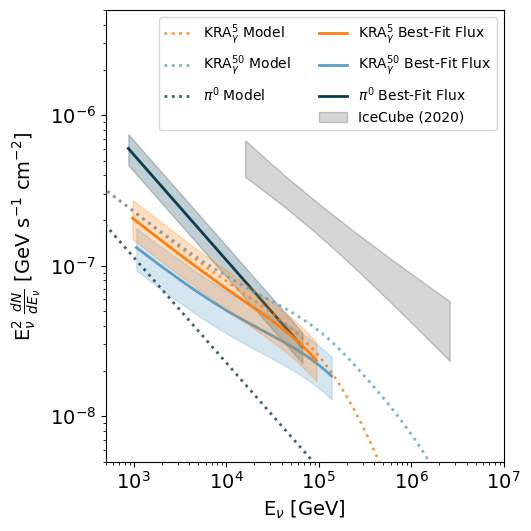

In [29]:
fig , ax = plt.subplots(figsize=(5.5,5.5))
plt.rc('font', size=10)
ax.plot(ebins5, ebins5**2 * (sum(kra5)) * hp.nside2pixarea(128) / 3 , ls=':', color=colors[0] ,
        lw=2, alpha=0.8, zorder=100, label='KRA$_\gamma^{5}$ Model')
ax.plot(ebins50, ebins50**2 * (sum(kra50)) * hp.nside2pixarea(128)/ 3, ls=':', color=colors[2],
        lw=2, alpha=0.8, zorder=100, label='KRA$_\gamma^{50}$ Model')
ax.plot(10**georg_energy, 4*np.pi*georg_flux, color=colors[1],
        lw=2, alpha=0.8, zorder=100, ls=':', label='$\pi^0$ Model')

ax.plot(np.nan, np.nan, label=' ', alpha=0)


#ax.plot(10 ** x_pred, 4*np.pi*10 ** y_pred, lw=3, linestyle = ":", 
#           label='$\pi^0$ Model')
'''(_, caps, _) = ax.errorbar(x[indices_UL], y[indices_UL], 
                           xerr=[x_err_low[indices_UL], x_err_high[indices_UL]], yerr=y[indices_UL]*0.5, fmt='o', 
                           c='dimgrey', linewidth=2.0, zorder=30, uplims=True, markersize=0)
(_, caps2, _) = ax.errorbar(x_new, y_new, xerr=[x_err_low_new, x_err_high_new], 
                            yerr=[y_err_low_new, y_err_high_new], fmt='o', c ='dimgrey', label="All-Sky Measured Flux", linewidth=2.0, zorder=31, markersize=0)
(_, caps4, _) = ax.errorbar(x_new, y_new, yerr=[y_err_low_new, y_err_high_new], 
                            fmt='o', c='dimgrey' , linewidth=2.0, zorder=31, markersize=0, capsize=0)

for cap in caps:
    cap.set_markeredgewidth(2)
'''
kra5_plot = ebins5[mask5]**2 *(sum(kra5)[mask5]) * hp.nside2pixarea(128)/ 3

ax.plot(ebins5[mask5], kra5_range[1] * kra5_plot , 
         c =colors[0], ls='-', zorder=10, lw=2, label='KRA$_\gamma^{5}$ Best-Fit Flux')
ax.fill_between(ebins5[mask5], kra5_range[0] * kra5_plot , kra5_range[-1] * kra5_plot,
        color = colors[0], alpha=.25, zorder=10)

kra50_plot = ebins50[mask50]**2 *(sum(kra50)[mask50]) * hp.nside2pixarea(128) / 3
ax.plot(ebins50[mask50], kra50_range[1] * kra50_plot,
         c =colors[2], ls='-', zorder=5, lw=2, label='KRA$_\gamma^{50}$ Best-Fit Flux')
ax.fill_between(ebins50[mask50],kra50_range[0] * kra50_plot, kra50_range[-1] * kra50_plot ,
        color = colors[2], zorder=5,  alpha=.25)

ax.plot(10**georg_energy[maskpi0_georg], 4*np.pi*pi0_model_range[1]*georg_flux[maskpi0_georg], 
        lw=2, c=colors[1], ls='-', zorder=3,
        label='$\pi^0$ Best-Fit Flux')
ax.fill_between(10**georg_energy[maskpi0_georg], 4*np.pi*pi0_model_range[0]*georg_flux[maskpi0_georg],
                4*np.pi*pi0_model_range[-1]*georg_flux[maskpi0_georg], zorder=3, color=colors[1], alpha=.25 )


#plt.plot(Es, 4*np.pi*bestfithans, c='dimgrey', lw='1', alpha=0.4, ls='--', label='M.G.Aartsen(2020)')
plt.fill_between(xs, 4*np.pi*mins, 4*np.pi*maxs, color='0.2', alpha=0.2,
                 edgecolor='k', label=r'IceCube (2020)')


#ax.arrow(2000, 1e-8, 19000, 0, width=.5e-9, 
#         length_includes_head = True, head_length=10**4 ,color=colors[0], alpha=0.8)
#ax.arrow(2000, 1e-8, -1000, 0, width=.5e-9, 
#         length_includes_head = True, head_length=10**4 ,color=colors[0], alpha=0.8)
alpha=1
'''ax.annotate(s='', xy=(1295,.8e-8),xycoords='data', xytext=(21155,.8e-8), 
            arrowprops=dict(arrowstyle='<->', facecolor=colors[1], ec=colors[1], alpha=alpha, lw=3), 
             color=colors[2], alpha=0.5)
ax.annotate(s='', xy=(1892,.7e-8), xytext=(37174,.7e-8), 
             arrowprops=dict(arrowstyle='<->', facecolor=colors[0], ec=colors[0], alpha=alpha, lw=3), color=colors[0], alpha=0.5)
ax.annotate(s='', xy=(2084,.6e-8), xytext=(50604,.6e-8), 
             arrowprops=dict(arrowstyle='<->', facecolor=colors[2], ec=colors[2], alpha=alpha, lw=3), 
            color=colors[1], alpha=0.5)

rect=mpatches.Rectangle((1200,.55e-8),50000,.4e-8, 
                        fill = False,
                        #fill_color='w',
                        color = "k",
                        alpha=0.8,
                        linewidth = 1)
                        
ax.text(1180,1.2e-8, 'Data Derived')
ax.text(1180,1e-8, 'Energy Range')
plt.gca().add_patch(rect)'''
plt.loglog()
#ax.set_ylim(1e-12,5e-9)
ax.set_ylim(5e-9,5e-6)
ax.set_xlim(500, 1e7)
plt.legend(ncol=2)
plt.rc('font', size=13)
ax.set_ylabel(r'E$_{\nu}^2$ $\frac{dN}{dE_\nu}$ [GeV s$^{-1}$ cm$^{-2}$]')
ax.set_xlabel(R'E$_\nu$ [GeV]')
plt.tight_layout()
#cy.plotting.saving(plot_dir, 'gp_flux')

-> /home/ssclafani/public_html/DNNC/paperplots/Fig4/gp_flux_full


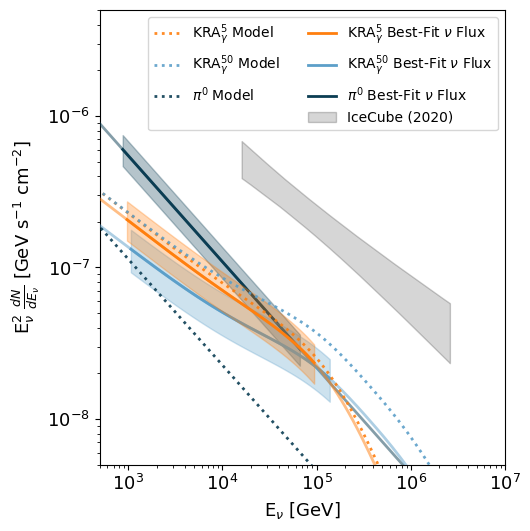

In [30]:
fig , ax = plt.subplots(figsize=(5.5,5.5))
plt.rc('font', size=10)
ax.plot(ebins5, ebins5**2 * (sum(kra5)) * hp.nside2pixarea(128) / 3 , ls=':', color=colors[0] ,
        lw=2, alpha=0.9, zorder=100, label='KRA$_\gamma^{5}$ Model')
ax.plot(ebins50, ebins50**2 * (sum(kra50)) * hp.nside2pixarea(128)/ 3, ls=':', color=colors[2],
        lw=2, alpha=0.9, zorder=100, label='KRA$_\gamma^{50}$ Model')
ax.plot(10**georg_energy, 4*np.pi*georg_flux, color=colors[1],
        lw=2, alpha=0.9, zorder=100, ls=':', label='$\pi^0$ Model')

ax.plot(np.nan, np.nan, label=' ', alpha=0)


kra5_plot = ebins5**2 *(sum(kra5)) * hp.nside2pixarea(128)/ 3
alpha1 = .15
alpha2 = .5
alpha3 = .3
ax.plot(ebins5, kra5_range[1] * kra5_plot , 
         c =colors[0], ls='-', zorder=10, lw=2, alpha=alpha2)
#ax.fill_between(ebins5, kra5_range[0] * kra5_plot , kra5_range[-1] * kra5_plot,
#        color = colors[0], alpha=alpha1, zorder=10)

kra50_plot = ebins50**2 *(sum(kra50)) * hp.nside2pixarea(128) / 3
ax.plot(ebins50, kra50_range[1] * kra50_plot,
         c =colors[2], ls='-', zorder=5, lw=2, alpha=alpha2)
#ax.fill_between(ebins50,kra50_range[0] * kra50_plot, kra50_range[-1] * kra50_plot ,
#        color = colors[2], zorder=5,  alpha=alpha1)

ax.plot(10**georg_energy, pi0_model_range[1]*4*np.pi*georg_flux, 
        lw=2, c=colors[1], ls='-', zorder=3,alpha=alpha2
        )
#ax.fill_between(10**georg_energy, pi0_range[0]*4*np.pi*georg_flux,
#                pi0_range[-1]*4*np.pi*georg_flux, zorder=3, color=colors[1], alpha=alpha1 )


kra5_plot = ebins5[mask5]**2 *(sum(kra5)[mask5]) * hp.nside2pixarea(128)/ 3

ax.plot(ebins5[mask5], kra5_range[1] * kra5_plot , 
         c =colors[0], ls='-', zorder=10, lw=2, label=r'KRA$_\gamma^{5}$ Best-Fit $\nu$ Flux')
ax.fill_between(ebins5[mask5], kra5_range[0] * kra5_plot , kra5_range[-1] * kra5_plot,
        color = colors[0], alpha=alpha3, zorder=10)

kra50_plot = ebins50[mask50]**2 *(sum(kra50)[mask50]) * hp.nside2pixarea(128) / 3
ax.plot(ebins50[mask50], kra50_range[1] * kra50_plot,
         c =colors[2], ls='-', zorder=5, lw=2, label=r'KRA$_\gamma^{50}$ Best-Fit $\nu$ Flux')
ax.fill_between(ebins50[mask50],kra50_range[0] * kra50_plot, kra50_range[-1] * kra50_plot ,
        color = colors[2], zorder=5,  alpha=alpha3)

ax.plot(10**georg_energy[maskpi0_georg], pi0_model_range[1]*4*np.pi*georg_flux[maskpi0_georg], 
        lw=2, c=colors[1], ls='-', zorder=3,
        label=r'$\pi^0$ Best-Fit $\nu$ Flux')
ax.fill_between(10**georg_energy[maskpi0_georg], 4*np.pi*pi0_model_range[0]*georg_flux[maskpi0_georg],
                4*np.pi*pi0_model_range[-1]*georg_flux[maskpi0_georg], zorder=3, color=colors[1], alpha=alpha3 )


#plt.plot(Es, 4*np.pi*bestfithans, c='dimgrey', lw='1', alpha=0.4, ls='--', label='M.G.Aartsen(2020)')
plt.fill_between(xs, 4*np.pi*mins, 4*np.pi*maxs, color='0.2', alpha=0.2,
                 edgecolor='k', label=r'IceCube (2020)')


alpha=1

plt.loglog()
#ax.set_ylim(1e-12,5e-9)
ax.set_ylim(5e-9,5e-6)
ax.set_xlim(500, 1e7)
plt.legend(ncol=2)
plt.rc('font', size=13)
ax.set_ylabel(r'E$_{\nu}^2$ $\frac{dN}{dE_\nu}$ [GeV s$^{-1}$ cm$^{-2}$]')
ax.set_xlabel(R'E$_\nu$ [GeV]')
plt.tight_layout()
cy.plotting.saving(plot_dir, 'gp_flux_full', dpi=500)

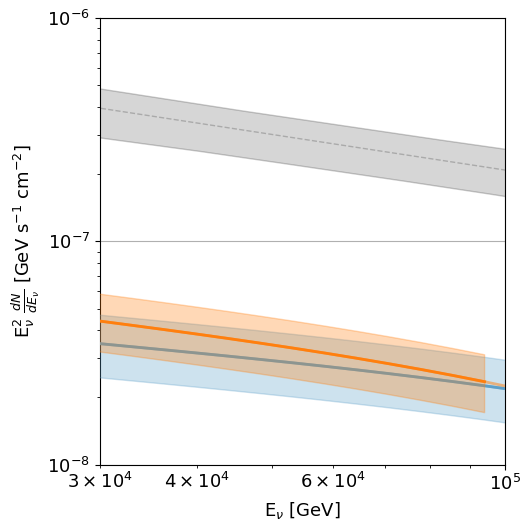

In [31]:
fig , ax = plt.subplots(figsize=(5.5,5.5))
plt.rc('font', size=10)
#ax.plot(ebins5, ebins5**2 * (sum(kra5)) * hp.nside2pixarea(128) / 3 , ls=':', color=colors[0] ,
#        lw=2, alpha=0.9, zorder=100, label='KRA$_\gamma^{5}$ Model')
#ax.plot(ebins50, ebins50**2 * (sum(kra50)) * hp.nside2pixarea(128)/ 3, ls=':', color=colors[2],
#        lw=2, alpha=0.9, zorder=100, label='KRA$_\gamma^{50}$ Model')
#ax.plot(10**georg_energy, 4*np.pi*georg_flux, color=colors[1],
#        lw=2, alpha=0.9, zorder=100, ls=':', label='$\pi^0$ Model')

ax.plot(np.nan, np.nan, label=' ', alpha=0)


kra5_plot = ebins5**2 *(sum(kra5)) * hp.nside2pixarea(128)/ 3
alpha1 = .15
alpha2 = .5
alpha3 = .3
ax.plot(ebins5, kra5_range[1] * kra5_plot , 
         c =colors[0], ls='-', zorder=10, lw=2, alpha=alpha2)
#ax.fill_between(ebins5, kra5_range[0] * kra5_plot , kra5_range[-1] * kra5_plot,
#        color = colors[0], alpha=alpha1, zorder=10)

kra50_plot = ebins50**2 *(sum(kra50)) * hp.nside2pixarea(128) / 3
ax.plot(ebins50, kra50_range[1] * kra50_plot,
         c =colors[2], ls='-', zorder=5, lw=2, alpha=alpha2)
#ax.fill_between(ebins50,kra50_range[0] * kra50_plot, kra50_range[-1] * kra50_plot ,
#        color = colors[2], zorder=5,  alpha=alpha1)

ax.plot(10**georg_energy, pi0_range[1]*4*np.pi*georg_flux, 
        lw=2, c=colors[1], ls='-', zorder=3,alpha=alpha2
        )
#ax.fill_between(10**georg_energy, pi0_range[0]*4*np.pi*georg_flux,
#                pi0_range[-1]*4*np.pi*georg_flux, zorder=3, color=colors[1], alpha=alpha1 )


kra5_plot = ebins5[mask5]**2 *(sum(kra5)[mask5]) * hp.nside2pixarea(128)/ 3

ax.plot(ebins5[mask5], kra5_range[1] * kra5_plot , 
         c =colors[0], ls='-', zorder=10, lw=2, label=r'KRA$_\gamma^{5}$ Best-Fit $\nu$ Flux')
ax.fill_between(ebins5[mask5], kra5_range[0] * kra5_plot , kra5_range[-1] * kra5_plot,
        color = colors[0], alpha=alpha3, zorder=10)

kra50_plot = ebins50[mask50]**2 *(sum(kra50)[mask50]) * hp.nside2pixarea(128) / 3
ax.plot(ebins50[mask50], kra50_range[1] * kra50_plot,
         c =colors[2], ls='-', zorder=5, lw=2, label=r'KRA$_\gamma^{50}$ Best-Fit $\nu$ Flux')
ax.fill_between(ebins50[mask50],kra50_range[0] * kra50_plot, kra50_range[-1] * kra50_plot ,
        color = colors[2], zorder=5,  alpha=alpha3)

ax.plot(10**georg_energy[maskpi0_georg], pi0_range[1]*4*np.pi*georg_flux[maskpi0_georg], 
        lw=2, c=colors[1], ls='-', zorder=3,
        label=r'$\pi^0$ Best-Fit $\nu$ Flux')
ax.fill_between(10**georg_energy[maskpi0_georg], pi0_range[0]*4*np.pi*georg_flux[maskpi0_georg],
                pi0_range[-1]*4*np.pi*georg_flux[maskpi0_georg], zorder=3, color=colors[1], alpha=alpha3 )


plt.plot(Es, 4*np.pi*bestfithans, c='dimgrey', lw='1', alpha=0.4, ls='--', label='M.G.Aartsen(2020)')
plt.fill_between(xs, 4*np.pi*mins, 4*np.pi*maxs, color='0.2', alpha=0.2,
                 edgecolor='k', label=r'M.G.$\,$Aartsen et al.(2020)')


alpha=1

plt.loglog()
#ax.set_ylim(1e-12,5e-9)
ax.set_ylim(1e-8,1e-6)
ax.set_xlim(3e4, 1e5)
ax.grid('both')
#plt.legend(ncol=2)
plt.rc('font', size=13)
ax.set_ylabel(r'E$_{\nu}^2$ $\frac{dN}{dE_\nu}$ [GeV s$^{-1}$ cm$^{-2}$]')
ax.set_xlabel(R'E$_\nu$ [GeV]')
plt.tight_layout()
#cy.plotting.saving(plot_dir, 'gp_flux_full', dpi=500)

In [32]:
kra5_plot = ebins5**2 *(sum(kra5)) * hp.nside2pixarea(128)/ 3
pi0_plot = 10**georg_energy[maskpi0_georg], pi0_range[1]*4*np.pi*georg_flux[maskpi0_georg]
kra50_plot = ebins50**2 *(sum(kra50)) * hp.nside2pixarea(128)/ 3
xinterp = np.logspace(4,5,51)

pi0_interpvals = np.interp(xinterp, pi0_plot[0], pi0_plot[1])
interpvals = np.interp(xinterp, ebins50, kra50_plot)

print(list(zip(xinterp, interpvals)))
#print(list(zip(xinterp, pi0_interpvals)))


[(10000.0, 8.549996694232831e-08), (10471.285480508985, 8.402565651066114e-08), (10964.78196143185, 8.267620835593381e-08), (11481.536214968817, 8.128123284972526e-08), (12022.644346174131, 7.998969726983929e-08), (12589.254117941662, 7.866854858433582e-08), (13182.567385564074, 7.74312895968506e-08), (13803.842646028837, 7.617853496699325e-08), (14454.39770745928, 7.499187976989651e-08), (15135.612484362071, 7.380216289381047e-08), (15848.93192461114, 7.266240639295404e-08), (16595.869074375598, 7.15304526723412e-08), (17378.00828749376, 7.043386518719155e-08), (18197.008586099826, 6.935449181871686e-08), (19054.607179632483, 6.829732962849265e-08), (19952.62314968879, 6.726545935974782e-08), (20892.96130854041, 6.624397852547464e-08), (21877.616239495517, 6.525465825601362e-08), (22908.676527677748, 6.42651316456737e-08), (23988.329190194898, 6.331355438788434e-08), (25118.864315095823, 6.235229159000801e-08), (26302.679918953814, 6.143382181904949e-08), (27542.28703338169, 6.0497191

-> /home/ssclafani/public_html/DNNC/paperplots/Fig4/gp_flux_sr


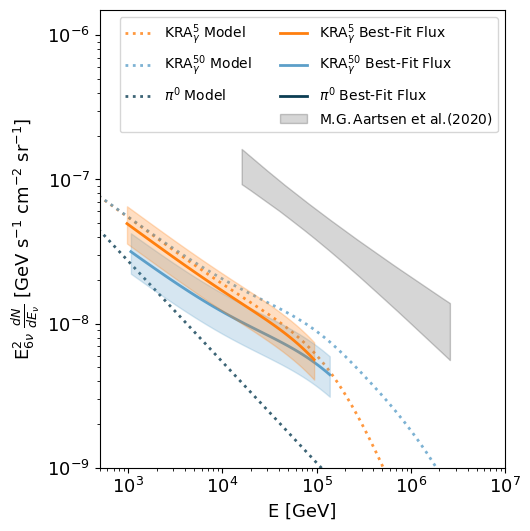

In [33]:
fig , ax = plt.subplots(figsize=(5.5,5.5))
plt.rc('font', size=10)
ax.plot(ebins5, ebins5**2 * (sum(kra5)) * hp.nside2pixarea(128) / (4*np.pi) , ls=':', color=colors[0] ,
        lw=2, alpha=0.8, label='KRA$_\gamma^{5}$ Model')
ax.plot(ebins50, ebins50**2 * (sum(kra50)) * hp.nside2pixarea(128)/ (4*np.pi), ls=':', color=colors[2],
        lw=2, alpha=0.8, label='KRA$_\gamma^{50}$ Model')
ax.plot(10**georg_energy, 3*georg_flux, color=colors[1],
        lw=2, alpha=0.8, ls=':', label='$\pi^0$ Model')

ax.plot(np.nan, np.nan, label=' ', alpha=0)

kra5_plot = ebins5[mask5]**2 *(sum(kra5)[mask5]) * hp.nside2pixarea(128)/ (4*np.pi)

ax.plot(ebins5[mask5], kra5_range[1] * kra5_plot , 
         c =colors[0], ls='-', zorder=10, lw=2, label='KRA$_\gamma^{5}$ Best-Fit Flux')
ax.fill_between(ebins5[mask5], kra5_range[0] * kra5_plot , kra5_range[-1] * kra5_plot,
        color = colors[0], alpha=.25, zorder=10)

kra50_plot = ebins50[mask50]**2 *(sum(kra50)[mask50]) * hp.nside2pixarea(128) / (4*np.pi)
ax.plot(ebins50[mask50], kra50_range[1] * kra50_plot,
         c =colors[2], ls='-', zorder=5, lw=2, label='KRA$_\gamma^{50}$ Best-Fit Flux')
ax.fill_between(ebins50[mask50],kra50_range[0] * kra50_plot, kra50_range[-1] * kra50_plot ,
        color = colors[2], zorder=5,  alpha=.25)

ax.plot(10**georg_energy[maskpi0_georg], 3*pi0_range[1]*georg_flux[maskpi0_georg], 
        lw=2, c=colors[1], ls='-', zorder=3,
        label='$\pi^0$ Best-Fit Flux')
ax.fill_between(10**georg_energy[maskpi0_georg], 3*pi0_range[0]*georg_flux[maskpi0_georg],
                3*pi0_range[-1]*georg_flux[maskpi0_georg], zorder=3, color=colors[1], alpha=.25 )


#plt.plot(Es, 4*np.pi*bestfithans, c='dimgrey', lw='1', alpha=0.4, ls='--', label='M.G.Aartsen(2020)')
plt.fill_between(xs, 3*mins,3* maxs, color='0.2', alpha=0.2,
                 edgecolor='k', label=r'M.G.$\,$Aartsen et al.(2020)')

plt.loglog()
#ax.set_ylim(1e-12,5e-9)
ax.set_ylim(1e-9,1.5e-6)
ax.set_xlim(500, 1e7)
plt.legend(ncol=2)
plt.rc('font', size=13)
ax.set_ylabel(r'E$_{6\nu}^2$ $\frac{dN}{dE_\nu}$ [GeV s$^{-1}$ cm$^{-2}$ sr$^{-1}$]')
ax.set_xlabel('E [GeV]')
plt.tight_layout()
cy.plotting.saving(plot_dir, 'gp_flux_sr')

In [ ]:
fig , ax = plt.subplots(figsize=(5.5,5.5))
plt.rc('font', size=10)
ax.plot(ebins5, ebins5**2 * (sum(kra5)) * hp.nside2pixarea(128) / 3 , ls=':', color=colors[0] ,
        lw=2, alpha=0.8, zorder=100, label='KRA$_\gamma^{5}$ Model')
ax.plot(ebins50, ebins50**2 * (sum(kra50)) * hp.nside2pixarea(128)/ 3, ls=':', color=colors[2],
        lw=2, alpha=0.8, zorder=100, label='KRA$_\gamma^{50}$ Model')
ax.plot(10**georg_energy, 4*np.pi*georg_flux, color=colors[1],
        lw=2, alpha=0.8, zorder=100, ls=':', label='$\pi^0$ Model')

ax.plot(np.nan, np.nan, label=' ', alpha=0)


kra5_plot = ebins5**2 *(sum(kra5)) * hp.nside2pixarea(128)/ 3

ax.plot(ebins5, kra5_range[1] * kra5_plot , 
         c =colors[0], ls='-', zorder=10, lw=2, label='KRA$_\gamma^{5}$ Best-Fit Flux')
#ax.fill_between(ebins5[mask5], kra5_range[0] * kra5_plot , kra5_range[-1] * kra5_plot,
#        color = colors[0], alpha=.25, zorder=10)

kra50_plot = ebins50**2 *(sum(kra50)) * hp.nside2pixarea(128) / 3
ax.plot(ebins50, kra50_range[1] * kra50_plot,
         c =colors[2], ls='-', zorder=5, lw=2, label='KRA$_\gamma^{50}$ Best-Fit Flux')
#ax.fill_between(ebins50[mask50],kra50_range[0] * kra50_plot, kra50_range[-1] * kra50_plot ,
#        color = colors[2], zorder=5,  alpha=.25)

ax.plot(10**georg_energy, pi0_range[1]*4*np.pi*georg_flux, 
        lw=2, c=colors[1], ls='-', zorder=3,
        label='$\pi^0$ Best-Fit Flux')
#ax.fill_between(10**georg_energy[maskpi0_georg], pi0_range[0]*4*np.pi*georg_flux[maskpi0_georg],
#                pi0_range[-1]*4*np.pi*georg_flux[maskpi0_georg], zorder=3, color=colors[1], alpha=.25 )


#plt.plot(Es, 4*np.pi*bestfithans, c='dimgrey', lw='1', alpha=0.4, ls='--', label='M.G.Aartsen(2020)')
plt.fill_between(xs, 4*np.pi*mins, 4*np.pi*maxs, color='0.2', alpha=0.2,
                 edgecolor='k', label=r'M.G.$\,$Aartsen et al.(2020)')


#ax.arrow(2000, 1e-8, 19000, 0, width=.5e-9, 
#         length_includes_head = True, head_length=10**4 ,color=colors[0], alpha=0.8)
#ax.arrow(2000, 1e-8, -1000, 0, width=.5e-9, 
#         length_includes_head = True, head_length=10**4 ,color=colors[0], alpha=0.8)
alpha=1
'''ax.annotate(s='', xy=(1295,.8e-8),xycoords='data', xytext=(21155,.8e-8), 
            arrowprops=dict(arrowstyle='<->', facecolor=colors[1], ec=colors[1], alpha=alpha, lw=3), 
             color=colors[2], alpha=0.5)
ax.annotate(s='', xy=(1892,.7e-8), xytext=(37174,.7e-8), 
             arrowprops=dict(arrowstyle='<->', facecolor=colors[0], ec=colors[0], alpha=alpha, lw=3), color=colors[0], alpha=0.5)
ax.annotate(s='', xy=(2084,.6e-8), xytext=(50604,.6e-8), 
             arrowprops=dict(arrowstyle='<->', facecolor=colors[2], ec=colors[2], alpha=alpha, lw=3), 
            color=colors[1], alpha=0.5)

rect=mpatches.Rectangle((1200,.55e-8),50000,.4e-8, 
                        fill = False,
                        #fill_color='w',
                        color = "k",
                        alpha=0.8,
                        linewidth = 1)
                        
ax.text(1180,1.2e-8, 'Data Derived')
ax.text(1180,1e-8, 'Energy Range')
plt.gca().add_patch(rect)'''
plt.loglog()
plt.grid('both')
#ax.set_ylim(1e-12,5e-9)
ax.set_ylim(1e-8,1e-7)
ax.set_xlim(1e4, 1e6)
plt.scatter(1e5,2.183e-8)
plt.legend(ncol=2)
plt.rc('font', size=13)
ax.set_ylabel(r'E$_{\nu}^2$ $\frac{dN}{dE_\nu}$ [GeV s$^{-1}$ cm$^{-2}$]')
ax.set_xlabel(R'E$_\nu$ [GeV]')
plt.tight_layout()
#cy.plotting.saving(plot_dir, 'gp_flux')

In [ ]:
georg_flux = np.load('/data/user/gschwefer/misc/for_steve/fermi_pi0_gamma_ray_allsky_average_E2Phi_2.7_extrapol.npy', allow_pickle=True)
georg_energy = np.load('/data/user/gschwefer/misc/for_steve/fermi_pi0_gamma_ray_energies.npy', allow_pickle=True)

In [ ]:
mask = 10**georg_energy > 1e2
xspace=np.arange(80000,500000,10000)
interp = np.interp(xspace,10**georg_energy[mask], georg_flux[mask])
print(list(zip(xspace, interp)))

In [ ]:
plt.plot(10**georg_energy, georg_flux)
plt.loglog()
plt.axvline(1e5, c='r', ls='--')
plt.ylim(1e-9,1e-4)
plt.xlim(1e-2,1e6)
plt.grid('both')
plt.ylabel('E$^2$ dN/dE$_\gamma$ GeV /s /cm$^2$ / sr^-1')
plt.xlabel('E (GeV)')
plt.plot(xspace, interp, c='r')

In [ ]:
mask = 10**georg_energy > 1e2
xspace=np.arange(80000,500000,10000)
interp = np.interp(xspace,10**georg_energy[mask], 4*np.pi*0.31*georg_flux[mask])
print(list(zip(xspace, interp)))